$\newcommand{\set}[2]{\big\{#1\,\ {\large:}\ \,#2\big\}}
\newcommand{\eps}{\varepsilon}
\newcommand{\abs}[1]{\left\vert#1\right\vert}
\newcommand{\ceil}[1]{\left\lceil#1\right\rceil}
\newcommand{\floor}[1]{\left\lfloor#1\right\rfloor}
$
# Localização de zeros de funções

## $ \S 1 $ Introdução

Um ponto $ \zeta $ (_zeta_) do domínio de uma função $ f $ de uma variável é dito um **zero** de $ f $ caso
$$ f(\zeta) = 0 .$$
Também dizemos que $ \zeta $ é uma **raiz** de uma equação em uma variável, digamos,
\begin{equation*}\label{E:raiz}
g(x) = h(x)\,, \tag{1}
\end{equation*}
se $ g(\zeta) = h(\zeta) $.

📝 Observe que encontrar uma raiz de \eqref{E:raiz} é equivalente a encontrar um zero de 
$$
f(x) = g(x) - h(x).
$$

A busca por zeros de uma função é um dos problemas mais freqüentes em Ciência e Engenharia. Entretanto, a sua determinação *analítica* é difícil ou impossível mesmo nos casos mais simples. De fato, essencialmente só conseguimos obter exatamente os zeros de uma função numa das três situações seguintes:
* A função é dada por um polinômio de grau $ \le 4 $; por exemplo $ 3 x + 2 $ ou $ 1.3 x^3 - 5.1 x^2 + 2.7 $. Nestes casos os zeros podem ser expressos através de fórmulas análogas à fórmula de Bhaskara.
* Por sorte já havíamos nos deparado com um zero da função; por exemplo, conhecemos uma raiz da equação $ \sqrt[3]{x} = 2 $ porque já havíamos calculado que $ 2^3 = 8 $.
* Podemos nos apoiar numa propriedade específica da função em questão; por exemplo, conseguimos encontrar uma solução de $ \cos x = \frac{1}{2} $ porque ao se colocar lado a lado duas cópias de um triângulo retângulo em que um dos ângulos mede $ \frac{\pi}{3} $, obtém-se um triângulo equilátero.

Em compensação, existem vários _métodos numéricos_ gerais que nos permitem encontrar zeros de funções contínuas arbitrárias com alta precisão e baixo uso de recursos computacionais, por mais complicadas que sejam estas funções, e.g.:
$$
f(x) = e^{3x^2\sin x\,}\,\big[\cos(5x) + 2\big]^{x^2+1} - \frac{7}{\sqrt{\abs{x}+1}}
$$

📝 Ainda que todas as funções usuais estudadas em Cálculo possam ser estendidas a funções de uma variável complexa, estaremos interessados aqui em encontrar apenas os _zeros reais de uma função real contínua de uma variável_. Não obstante, algumas das técnicas que estudaremos, em especial o método de Newton, também podem ser aplicadas a funções complexas.

O sistema de ponto flutuante empregado em computação impõe restrições inevitáveis à precisão do cálculo dos valores de uma função. Por isto na prática não podemos esperar encontrar um ponto $ \zeta $ onde a função valha exatamente $ 0 $, como ilustrado no exemplo abaixo. Em vez disto, buscamos encontrar um *intervalo* suficientemente pequeno onde a função troca de sinal.

**Problema 1:** Considere os polinômios
$$ p(x) = 2x - 0.2 \qquad \text{e} \qquad q(x) = 3 x - 0.3 $$
Note que $ a = \frac{1}{10} $ é um zero tanto de $ p $ quanto de $ q $.

(a) Usando `lambda`, defina $ p(x) $ e $ q(x) $ como funções em Python.

(b) Agora defina um procedimento `checa_zero(f, x)` que, dados uma função $ f $ e um número $ x $ em seu domínio, retorna `True` se `f(x) == 0` e `False` caso contrário. Qual é o resultado da aplicação deste procedimento aos pares $ (p, a) $ e $ (q, a) $? Como você explica esta discrepância?

(c) Como poderíamos modificar a definição de `checa_zero` de modo que ela acuse que $ q $ possui um zero em $ a $? Quais as desvantagens da sua proposta?

*Solução:*

## $ \S 2 $ Localização de raízes

### $ 2.1 $ O Teorema do Valor Intermediário

**Teorema 1 (Teorema do Valor Intermediário):** Seja $ f \colon [a, b] \to \mathbb R $ uma função _contínua_. Então $ f $ assume em $ [a, b] $ todos os valores possíveis entre $ f(a) $ e $ f(b) $.

⚡ **Demonstração informal:** Suponha por concretude que $ f(a) < f(b) $ e seja $ r $ um valor qualquer entre eles. Imaginando o gráfico da função contínua $ f $, isto significa que em $ a $ ele está abaixo da reta de equação $ y = r $ e em $ b $ acima. Queremos mostrar que em algum momento ele cruza esta reta.

Considere o conjunto
$$
C = \set{x \in [a,b]}{f(x) < r}.
$$
Então $ C $ é não-vazio, pois contém $ a $. Além disto, $ b $ é cota superior para $ C $. Seja $ c \in [a, b] $ a *menor* cota superior para $ C $, i.e.:
1. $ x \le c $ para todo $ x \in C $ (significando que $ c $ é cota superior);
2. Se $ \eps > 0 $, então $ x - \eps $ não é cota superior de $ C $ (significando que $ c $ é a *menor* possível dentre as cotas superiores).

Observe que por continuidade de $ f $ em $ a $ e em $ b $, temos $ a < c < b $. Agora, há apenas três opções:
* $ f(c) < r $. Neste caso por continuidade de $ f $ em $ c $, $ f(x) < r $ para todo $ x $ suficientemente próximo de $ c $. Em particular, $ x \in C $ para algum $ x > c $. Mas isto contradiz o fato que $ c $ é cota superior de $ C $.
* $ f(c) > r $. Novamente por continuidade de $ f $ em $ c $, $ f(x) > r $ para todo $ x $ num intervalo suficientemente pequeno ao redor de $ c $. Em particular, qualquer $ x < c $ aí ainda é cota superior de $ C $. Isto contradiz o fato que $ c $ é a *menor* cota superior de $ C $.
* Conseqüentemente, deve valer a única opção restante: $ f(c) = r $. Isto estabelece a conclusão desejada.
<div style="text-align: right">$ \blacksquare $ </div>

O resultado abaixo segue imediatamente do TVI. Apesar de simples, ele é a base dos vários métodos que estudaremos para obtenção de raízes de equações.

**Corolário 2 (Teorema de Bolzano):** _Seja $ f $ uma função contínua definida num intervalo. Se_
$$ f(c)f(d) < 0\ , $$
_então $ f $ possui pelo menos um zero no subintervalo de extremidades $ c $ e $ d $._

Informalmente, se os sinais dos valores de $ f $ em dois pontos são opostos, entre eles deve existir algum zero.

**Problema 2:** Mostre que:

(a) Existe um número $ a > 1 $ tal que $ a^a = 23 $.

(b) Este número é único. *Dica:* Considere a função $ f(x) = x^x $ para $ x > 1 $ e calcule sua derivada.

*Solução:*

**Problema 3:** Seja $ n $ um inteiro qualquer.

(a) Mostre analiticamente ou com ajuda do computador que a função tangente assume valores de sinais opostos em
$$
a_n = n\pi + \frac{\pi}{4} \quad \text{e} \quad b_n = n \pi + \frac{3\pi}{4}.
$$

(b) Existe um zero entre $ \frac{\pi}{4} $ e $ \frac{3\pi}{4} $? Justifique, em vista do Corolário 2. *Dica:* Esboce num papel o gráfico da função tangente. Quais são os pontos de descontinuidade?

(c) Mais geralmente, existe um zero $ c_n $ no intervalo $ (a_n,b_n) $? E no intervalo $ \big(b_n, a_{n+1}\big) $?

*Solução:*

In [ ]:
from numpy import tan, pi, sign

### $ 2. 2 $ Descrição do procedimento para localização de uma raiz e critérios de parada

Todos os métodos para localização de zeros que estudaremos são *iterativos*. Partindo de uma estimativa inicial para um zero $ \zeta $, a cada passo utilizamos a estimativa anterior para obter uma aproximação mais refinada para $ \zeta $, até que esta seja julgada boa o suficiente. Os *critérios de parada* mais comuns são:
1. A distância entre o zero $ \zeta $ e sua aproximação atual é menor que um $ \eps > 0 $ escolhido previamente.
2. O valor da função na aproximação atual é menor que $ \eps $ em valor absoluto.
3. O número de iterações excede uma cota $ N$ pré-fixada.

**Problema 4:** Construa um procedimento `checa_zero` que tem por parâmetros: uma função real $ f $; dois pontos $ a $ e $ b $ em seu domínio; e uma constante $ \eps > 0 $; e que retorna `True` se e somente se:
* $ \abs{b-a} < \eps $; e
* $ \abs{f(m)} < \eps $, onde $ m $ é o ponto médio de $ a $ e $ b $.

*Solução:*

### $ 2.3 $ Encaixotamento de zeros

Qualquer dos métodos que estudaremos requer como passo preliminar o **encaixotamento** de um zero, ou seja, a determinação de um intervalo onde $ f $ troca de sinal. A escolha deste intervalo é crucial: para algumas escolhas o método em questão pode convergir muito lentamente ou até falhar.

Para encaixotar um zero de uma função, as três opções mais comuns são:
* Usar a a teoria subjacente para advinhar a sua localização aproximada, no caso em que a função provém de um modelo da Física ou Engenharia;
* Esboçar o gráfico da função e estimar visualmente um subintervalo onde ele cruza o eixo-$x$;
* Aplicar uma busca sistemática, avaliando o sinal da função em pontos sucessivos para localizar um subintervalo onde a função troca de sinal.

Destes três métodos, apenas o terceiro é rígido o suficiente para ser programado com facilidade, o que não quer dizer que os outros dois sejam menos valiosos.

📝 **Isolar** um zero significa encontrar um intervalo que o contém em seu interior mas que não contém qualquer outro zero. Se um intervalo contém mais de um zero, em geral não há como controlar para qual deles um método convergirá, por isto sempre que possível é desejável isolar um zero, não somente encaixotá-lo.

## $ \S 3 $ Esboço do gráfico de uma função de uma variável

Em Python, para se traçar e visualizar gráficos, geralmente utiliza-se o submódulo **PyPlot** da biblioteca **Matplotlib**:

In [ ]:
import matplotlib.pyplot as plt

Neste caderno utilizaremos o procedimento abaixo para esboçar de maneira conveniente o gráfico de uma ou mais funções.

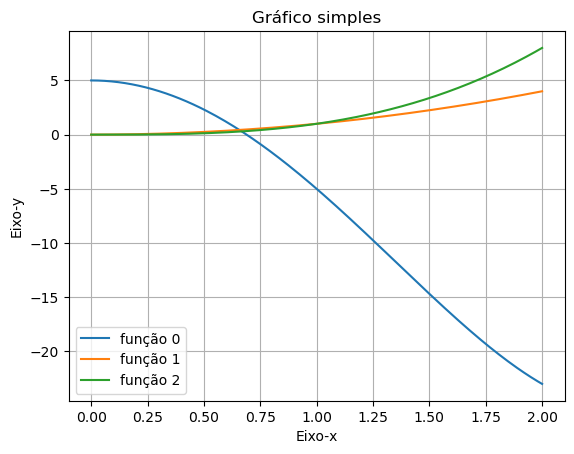

In [4]:
def plota_funcoes(a, b, N, *fs):
    """
    Entradas:
        * Extremidades a < b de um intervalo.
        * Número N de pontos na amostra dos valores de x.
        * Um número qualquer (>= 1) de funções definidas em [a, b].
    Exibe num mesmo diagrama o gráfico das funções e retorna None.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    x = np.linspace(a, b, N)                    # Amostra de valores de x
    for i, f in enumerate(fs):
        plt.plot(x, f(x), label=f'função {i}')  # Plotar dados: (x, y, etiqueta).
    plt.xlabel('Eixo-x')
    plt.ylabel('Eixo-y')
    plt.grid(True)
    plt.title("Gráfico simples")
    plt.legend()
    
    return None
    
f = lambda x: x**4 - 11 * x**2 + 5
g = lambda x: x**2
h = lambda x: x**3
plota_funcoes(0, 2, 200, f, g, h)
